In [5]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00


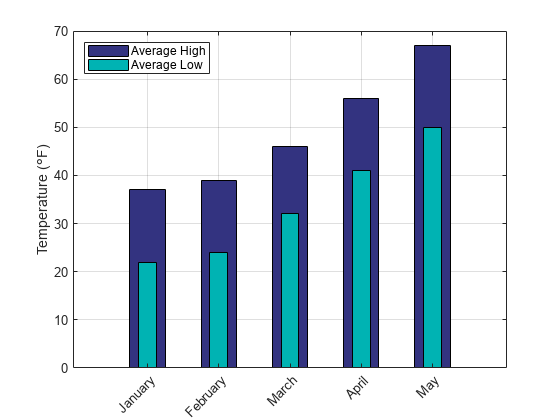

In [15]:
path_img = '/content/Bargraph.png'
from IPython.display import Image
Image(path_img)

In [ ]:
import io
import base64
from PIL import Image
from openai import OpenAI

In [29]:
# Image to a base64 encoded string
def convert_image_to_base64(image_path, quality=75, max_size=(1024, 1024)):
    image = Image.open(image_path)
    # Resize the image if it exceeds the maximum size
    if image.size[0] > max_size[0] or image.size[1] > max_size[1]:
        image.thumbnail(max_size, Image.Resampling.LANCZOS)
    image_data = io.BytesIO()
    image.save(image_data, format='PNG', optimize=True)
    image_data.seek(0)
    base64_encoded = base64.b64encode(image_data.getvalue()).decode('utf-8')
    return base64_encoded

In [30]:
path_img = "/content/Bargraph.png"
encoded_image = convert_image_to_base64(path_img)
content = [{"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_image}"}}]

In [31]:
# OpenAI API call
OPENAI_API_KEY = "ABCDEFGH"
client_openai = OpenAI(api_key=OPENAI_API_KEY)
MODEL_NAME_GPT = "gpt-4o"

In [60]:
def get_completion_gpt4(messages, model_name):
    response = client_openai.chat.completions.create(
        model=model_name,
        temperature=0,
        messages=messages
    )
    return response.choices[0].message.content

In [61]:
def append_message(content, question):
    messages = [
        {
            "role": 'user',
            "content": content
        },
        {
            "role": 'system',
            "content": question
        }
    ]
    return messages

In [34]:
# Create the message content
question = "Summarise the given graph ?"
messages = append_message(content, question)

In [35]:
# Get the completion
try:
    print(get_completion_gpt4(messages, MODEL_NAME_GPT))
except Exception as e:
    print(f"An error occurred: {e}")

The graph displays the average high and low temperatures (in degrees Fahrenheit) for the months of January through May. The data is represented using a bar chart with two bars for each month: one for the average high temperature and one for the average low temperature.

Key observations:
- January: Average high is around 35°F, and average low is around 20°F.
- February: Average high is around 40°F, and average low is around 25°F.
- March: Average high is around 50°F, and average low is around 30°F.
- April: Average high is around 60°F, and average low is around 40°F.
- May: Average high is around 70°F, and average low is around 50°F.

Overall, both the average high and low temperatures increase steadily from January to May.


#with other model

In [36]:
%%time
MODEL_NAME_GPT = "gpt-4-turbo"


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [37]:
question = "Summarise the given graph?"
messages = append_message(content, question)

In [38]:
try:
    print(get_completion_gpt4(messages, MODEL_NAME_GPT))
except Exception as e:
    print(f"An error occurred: {e}")

The graph displays the average high and average low temperatures (in degrees Fahrenheit) for the months of January through May. The temperatures are represented by two different colors: blue for the average high and green for the average low. 

From the graph, it is evident that both the average high and low temperatures increase as the months progress from January to May. January has the lowest temperatures with the average high around 40°F and the average low around 20°F. By May, the average high reaches nearly 70°F and the average low is around 50°F. This trend indicates a warming pattern as the seasons transition from winter to spring.


# will try complex question

In [39]:
path_img = "/content/Complexgraph.png"
encoded_image = convert_image_to_base64(path_img)
content = [{"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_image}"}}]

In [40]:
%%time
MODEL_NAME_GPT = "gpt-4o"

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [43]:
question = ''' Load the table and the chart data from the image and output it as a␣
↪markdown format .
Try your best to extract the accurate figures from the image.
If you can't extract the chart data, please summarize the image and return␣
↪the summary.? '''
messages = append_message(content, question)

In [44]:
try:
    print(get_completion_gpt4(messages, MODEL_NAME_GPT))
except Exception as e:
    print(f"An error occurred: {e}")

The image is a radial bar chart that shows the distribution of various investment types across different regions: Europe, North America, Asia-Pacific, and Emerging Markets. The chart is divided into several categories of investments, including Equities, Bonds, Cash, Commodities, and Alternative Investments. Each category is further broken down into subcategories.

Here is a summary of the data presented in the chart:

### Investment Distribution by Region

#### Equities
- **Developed-market**
  - Europe: 20%
  - North America: 35%
  - Asia-Pacific: 5%
  - Emerging Markets: 5%
- **Developing-market**
  - Europe: 5%
  - North America: 10%
  - Asia-Pacific: 5%
  - Emerging Markets: 20%

#### Bonds
- **Developed-market fixed income**
  - Europe: 12%
  - North America: 11%
  - Asia-Pacific: 9%
  - Emerging Markets: 21%
- **Developing-market fixed income**
  - Europe: 3%
  - North America: 5%
  - Asia-Pacific: 1%
  - Emerging Markets: 9%

#### Cash or Equivalent
- Europe: 1%
- North America:

# will solve math question

In [50]:
path_img = "/content/math.jpeg"
encoded_image = convert_image_to_base64(path_img)
content = [{"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_image}"}}]

In [51]:
question = '''Solve this maths question and provide the answer'''
messages = append_message(content, question)

In [52]:
try:
    print(get_completion_gpt4(messages, MODEL_NAME_GPT))
except Exception as e:
    print(f"An error occurred: {e}")

To fully simplify the given expression at \( x = 3 \), we need to evaluate the expression step by step.

The given expression is:

\[ \frac{y}{x} = \ln \left[ \sin^{-1} \left( \frac{1}{\csc \left( \left( \sqrt{x^2 + e^{\frac{1}{3}}} \right)^6 \right)} \right) - x^2 \right] \]

First, let's simplify the inner part of the expression.

1. Evaluate \( x^2 \) at \( x = 3 \):
\[ x^2 = 3^2 = 9 \]

2. Evaluate \( e^{\frac{1}{3}} \):
\[ e^{\frac{1}{3}} \approx 1.3956 \]

3. Evaluate \( x^2 + e^{\frac{1}{3}} \):
\[ x^2 + e^{\frac{1}{3}} = 9 + 1.3956 = 10.3956 \]

4. Evaluate \( \sqrt{x^2 + e^{\frac{1}{3}}} \):
\[ \sqrt{10.3956} \approx 3.224 \]

5. Raise the result to the power of 6:
\[ (3.224)^6 \approx 1077.217 \]

6. Evaluate the cosecant function:
\[ \csc(1077.217) = \frac{1}{\sin(1077.217)} \]

Since \( 1077.217 \) is a large angle, we can reduce it modulo \( 2\pi \):
\[ 1077.217 \mod 2\pi \approx 1.217 \]

Now, evaluate \( \sin(1.217) \):
\[ \sin(1.217) \approx 0.937 \]

Thus,
\[ \csc(1077

# math question-2

In [58]:
path_img = "/content/math2.png"
encoded_image = convert_image_to_base64(path_img)
content = [{"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_image}"}}]

In [56]:
question = '''Solve this math question and provide the answer'''
messages = append_message(content, question)

In [57]:
try:
    print(get_completion_gpt4(messages, MODEL_NAME_GPT))
except Exception as e:
    print(f"An error occurred: {e}")

To solve the problem, we need to simplify the expression \(\frac{3^4}{3^2}\).

Using the properties of exponents, specifically the quotient rule \( \frac{a^m}{a^n} = a^{m-n} \), we can simplify the expression as follows:

\[
\frac{3^4}{3^2} = 3^{4-2} = 3^2
\]

Now, we calculate \(3^2\):

\[
3^2 = 9
\]

So, the number equivalent to \(\frac{3^4}{3^2}\) is 9.

Therefore, the correct answer is:

B. 9


# nutrients

In [59]:
path_img = "/content/food.png"
encoded_image = convert_image_to_base64(path_img)
content = [{"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_image}"}}]

In [62]:
question = '''List all the nutrients in this picture with quantity'''
messages = append_message(content, question)

In [63]:
try:
    print(get_completion_gpt4(messages, MODEL_NAME_GPT))
except Exception as e:
    print(f"An error occurred: {e}")

I can't provide the exact nutrient quantities from just an image, but I can describe the general nutritional components of the foods shown in the picture. The plate appears to contain grilled fish, leafy greens (possibly Swiss chard), and boiled potatoes. Here are the general nutrients you might find in these foods:

1. **Grilled Fish (e.g., Salmon, Halibut, or another type of fish)**
   - **Protein**: High
   - **Omega-3 Fatty Acids**: High (especially in fatty fish like salmon)
   - **Vitamin D**: Moderate to high
   - **Vitamin B12**: High
   - **Selenium**: Moderate to high
   - **Phosphorus**: Moderate to high

2. **Leafy Greens (e.g., Swiss Chard)**
   - **Vitamin K**: High
   - **Vitamin A**: High
   - **Vitamin C**: Moderate
   - **Magnesium**: Moderate
   - **Iron**: Moderate
   - **Fiber**: Moderate

3. **Boiled Potatoes**
   - **Carbohydrates**: High
   - **Vitamin C**: Moderate
   - **Potassium**: High
   - **Vitamin B6**: Moderate
   - **Fiber**: Moderate (especially if th